# Deep Learning Indonesia.AI
Pertemuan - 3 Deep Learning Basic Concept

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

plt.style.use('ggplot')
%matplotlib inline

# Load Datasets

In [16]:
df_diabetes = pd.read_csv('pima_diabetes.csv',  names=['preg_times', 'glucose', 'blood_press',
                                                        'skin_thickness', 'insulin', 'BMI', 
                                                        'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


In [18]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
preg_times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_press,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Check Missing Value

In [19]:
df_diabetes.isna().any()

preg_times        False
glucose           False
blood_press       False
skin_thickness    False
insulin           False
BMI               False
pedigree          False
age               False
class             False
dtype: bool

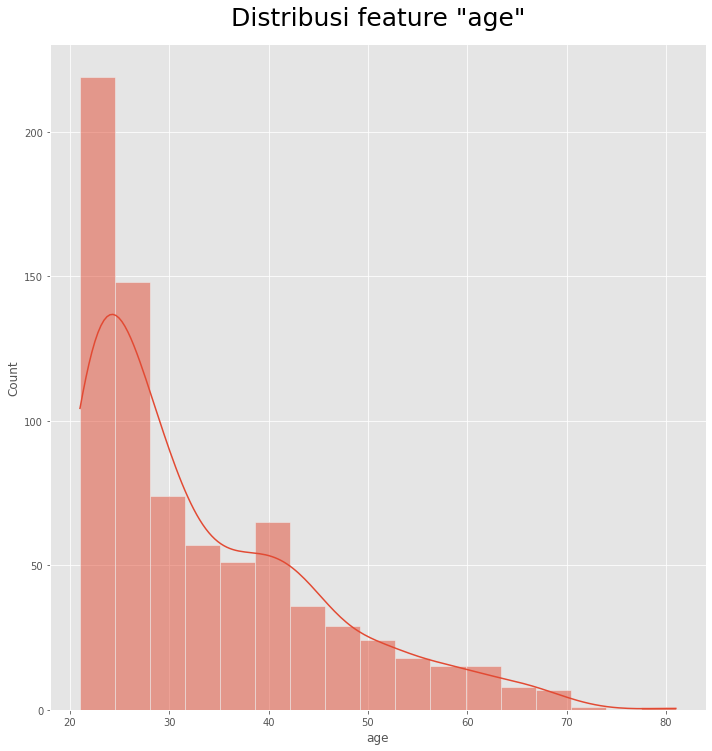

In [20]:
sns.displot(df_diabetes['age'], kde=True, height=10, aspect=1)
plt.title('Distribusi feature "age"',fontsize=25,pad=20)
plt.show()

# Split Datasets

In [21]:
features = df_diabetes.drop('class', axis=1)
labels = df_diabetes['class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [23]:
print(f'Data Feature Training : {X_train.shape[0]}')
print(f'Data Labels Training : {y_train.shape[0]}')
print(f'Data Feature Testing : {X_test.shape[0]}')
print(f'Data Label Testing : {y_test.shape[0]}')

Data Feature Training : 614
Data Labels Training : 614
Data Feature Testing : 154
Data Label Testing : 154


# Define Model

`Note` 
* units = Neurons
* activation = Activation function
* input_dim = Dimension of input

In [24]:
model = Sequential(name='first_layer')

model.add(Dense(units=12, input_dim=8, activation='relu')) # input layer
model.add(Dense(units=8, activation='relu')) # Hidden Layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer

In [25]:
model.summary()

Model: "first_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


**Note** <br>
Parameters get from multipication from input with neuron add with bias
$$ parms = units \times input + units $$

example :
```python
dense_3 = 12 * 8 + 12 = 108
dense_4 = 8 * 12 + 8 = 104
dense_5 = 1 * 8 + 1 = 9
```

# Compile Model

In [27]:
model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(), 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=['accuracy'])

# Train Model

In [28]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 [==============================] - 2s 3ms/step - loss: 0.7500 - accuracy: 0.6368
Epoch 2/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6547
Epoch 3/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6531
Epoch 4/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6515
Epoch 5/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6547
Epoch 6/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6531
Epoch 7/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6531
Epoch 8/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6531
Epoch 9/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6531
Epoch 10/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6547
Epoch 11/

# Visualization model

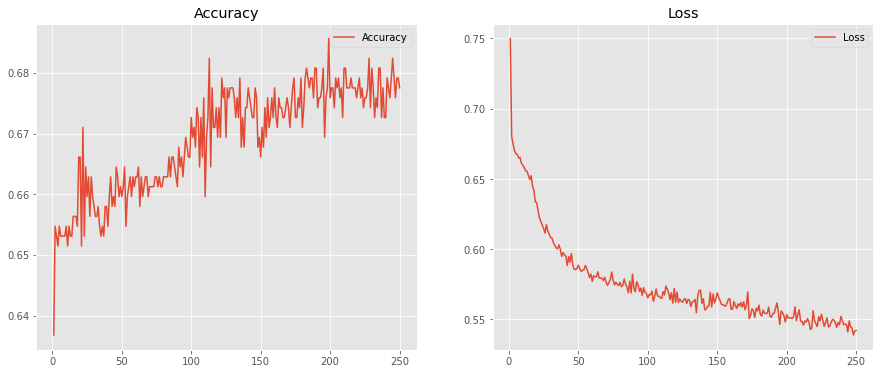

In [29]:
epoch_range = np.arange(1,251)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, model.history.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, model.history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluate Model


**Note**
* verbose=0 will show you nothing (silent)

* verbose=1 will show you an animated progress bar like this: <br>
    5/5 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7532

* verbose=2 will just mention the number of epoch like this:
    ```python
    Epoch 1/250
    ```

In [30]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=True)

print(f'Accuracy by percents: {accuracy*100:.2f}')

5/5 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6623
Accuracy by percents: 66.23


*Conclusion*
1. Deep learning is `robust`
2. Deep learning has feature extraction